In [1]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers
from tensorflow.keras import backend as K
import numpy as np
import matplotlib.pyplot as plt
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

In [2]:
tf.config.list_physical_devices()

2022-02-22 15:28:18.447355: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:922] could not open file to read NUMA node: /sys/bus/pci/devices/0000:08:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-02-22 15:28:18.470683: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:922] could not open file to read NUMA node: /sys/bus/pci/devices/0000:08:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-02-22 15:28:18.471042: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:922] could not open file to read NUMA node: /sys/bus/pci/devices/0000:08:00.0/numa_node
Your kernel may have been built without NUMA support.


[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
square = models.Sequential()
#n_zernike = 8
#n_actuators = 51
opt = optimizers.Adam()
square.add(layers.Dense(2, input_shape=[2]))
square.add(layers.Dense(512,activation='relu', kernel_initializer='normal'))
square.add(layers.Dropout(0.5))
square.add(layers.Dense(512, activation='relu', kernel_initializer='normal'))
square.add(layers.Dropout(0.5))
square.add(layers.Dense(1, activation='linear'))
square.compile(loss="mse", optimizer=opt)

2022-02-22 15:28:18.484921: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-02-22 15:28:18.489198: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:922] could not open file to read NUMA node: /sys/bus/pci/devices/0000:08:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-02-22 15:28:18.489684: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:922] could not open file to read NUMA node: /sys/bus/pci/devices/0000:08:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-02-22 15:28:18.490014: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:922] could not open file to read NUMA node: /sys/bus/pci/devices/0000:08:00.0/numa_node
Your kernel may have been built witho

In [4]:
%matplotlib inline
x = np.linspace(0, 10, 2000).reshape(-1, 1)
y = np.linspace(0, 10, 2000).reshape(-1, 1)
xx, yy = np.meshgrid(x, y)
x = xx.reshape(-1, len(x)**2)
y = yy.reshape(-1, len(y)**2)

f = lambda x, y: np.sin(x)*np.cos(y)
z = f(x, y).T
print(np.min(x), np.max(x))
inpu = np.vstack((x, y)).T
print(inpu.shape)

0.0 10.0
(4000000, 2)


In [5]:
inp = np.hstack((x, y))
hist = square.fit(inpu, z, batch_size=1000, epochs=1)

4000/4000 [==============================] - 13s 3ms/step - loss: 0.0610


(2500, 1)


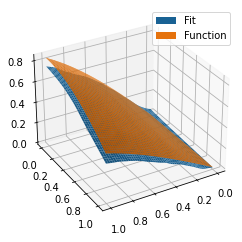

In [9]:
%matplotlib inline
ax = plt.subplot(projection='3d')
x = np.linspace(0, 1).reshape(-1, 1)
y = np.linspace(0, 1).reshape(-1, 1)
xx, yy = np.meshgrid(x, y)
x = xx.reshape(-1, len(x)**2)
y = yy.reshape(-1, len(y)**2)
res = square(np.vstack((x, y)).T)
print(res.shape)
surf = ax.plot_surface(xx, yy, np.array(res).reshape(50, 50), label='Fit')
surf._facecolors2d = surf._facecolor3d
surf._edgecolors2d = surf._edgecolor3d
surf = ax.plot_surface(xx, yy, f(xx, yy), label='Function')
surf._facecolors2d = surf._facecolor3d
surf._edgecolors2d = surf._edgecolor3d
plt.legend()
ax.view_init(30, 60)